### Course: [ChatGPT Prompt Engineering for Developers](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/1/introduction)

In this course, you will learn:
- The difference between base LLMs and instruction-tuned LLMs, and why the latter are more suitable for most practical applications
- The best practices for prompting instruction-tuned LLMs, such as being clear and specific, giving the LLM time to think, and providing relevant context and tone
- The common use cases for LLMs, such as summarizing, inferring, transforming, and expanding text
- How to build a chatbot using an LLM and how to evaluate its performance

### Part 7. The Chat Format

In this notebook, you will explore how you can utilize the chat format to have extended conversations with chatbots personalized or specialized for specific tasks or behaviors.

Outline:
- Setup
- OrderBot

##### Helper Function

- Throughout this course, we will use OpenAI's `gpt-3.5-turbo` model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat). 
- This helper function will make it easier to use prompts and look at the generated outputs:

In [1]:
import openai
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())
openai.api_key  = os.getenv('OPENAI_API_KEY')

def get_completion(prompt, model="gpt-3.5-turbo", temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

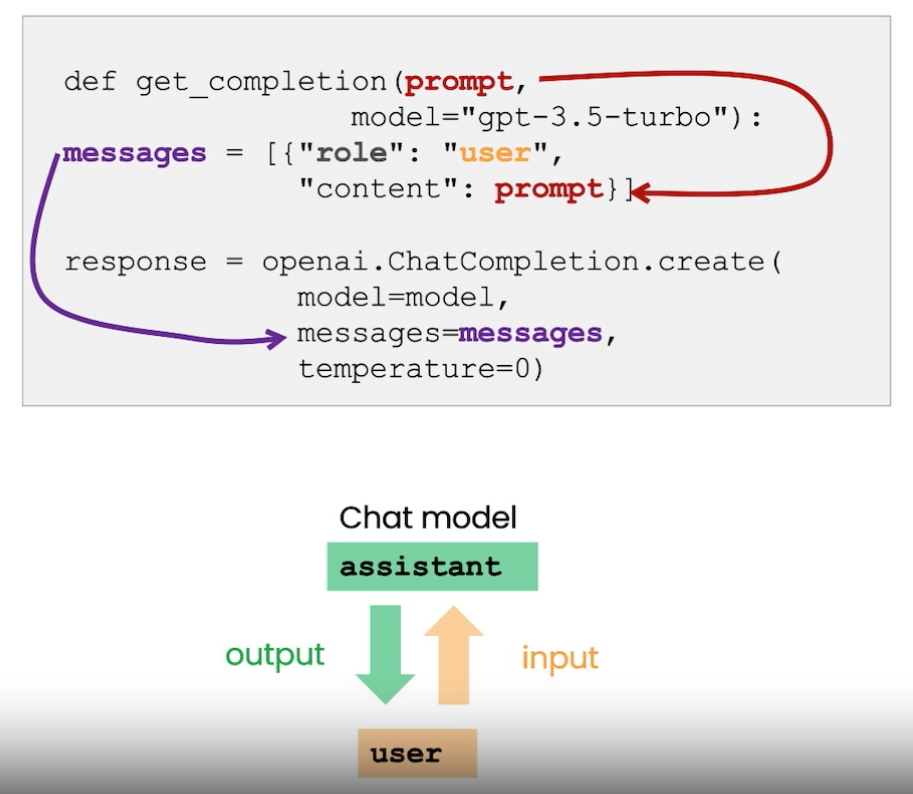

##### 1. Setup 

In [2]:
def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

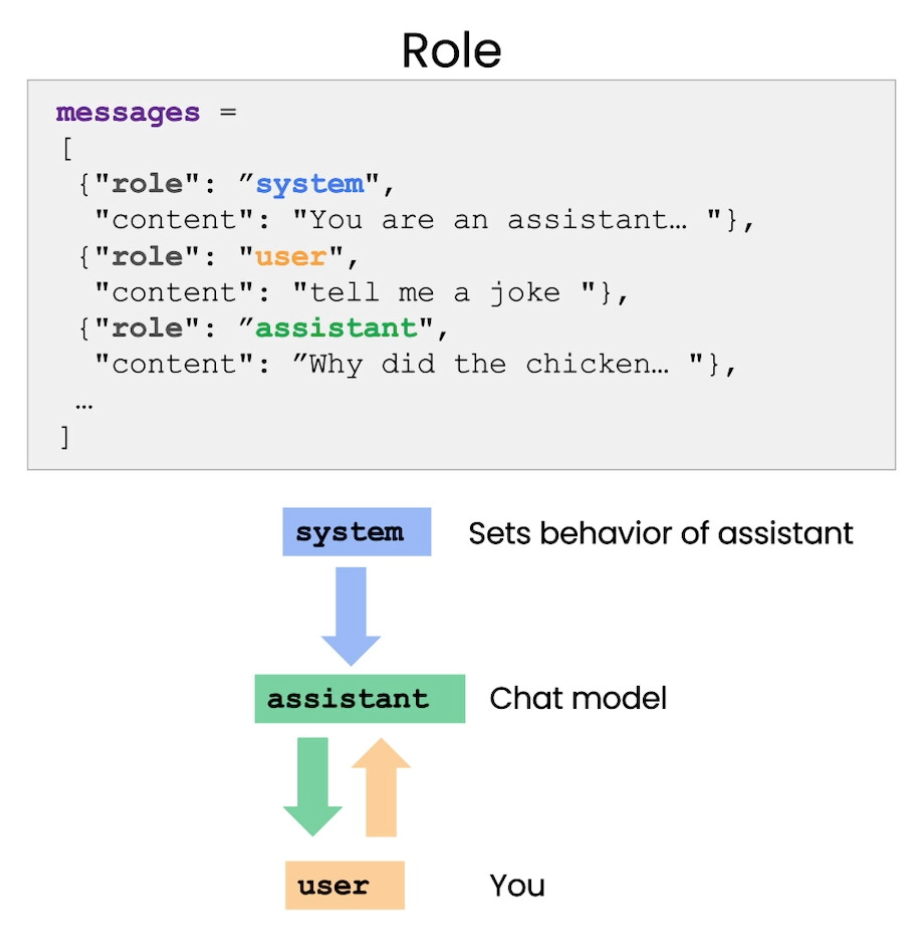

In [3]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

In [4]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

Why, to be on the other side, of course! A most comical jest, methinks.


In [5]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Isa! How can I assist you today?


In [6]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

I'm sorry, but I am a chatbot and I do not have access to personal information. Therefore, I do not know your name. If you would like to tell me your name, feel free to do so and I'll be happy to address you by it!


In [8]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Your name is Isa. Is there anything else I can assist you with?


##### 2. OrderBot

In [11]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, styles={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

In [12]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

BokehModel(combine_events=True, render_bundle={'docs_json': {'447bd263-9f8c-4955-9753-898fd573b2bf': {'version…